In [1]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dataset.generators import get_dataset, get_dataset_with_masks

OpenCV is built with OpenMP support. This usually results in poor performance. For details, see https://github.com/tensorpack/benchmarks/blob/master/ImageNet/benchmark-opencv-resize.py


# Dataset for models based on mobilenetv3

In [6]:
annot_path_val = '../datasets/coco_2017_dataset/annotations/person_keypoints_val2017.json'
img_dir_val = '../datasets/coco_2017_dataset/val2017/'

ds, ds_size = get_dataset(annot_path_val, img_dir_val, batch_size=10)

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000


## Get batch

In [7]:
x,y = next(ds.__iter__())

print ("Inputs:")
print (x.shape)

print ("Outputs:")
for output in y:
    print (output.shape)
    

Inputs:
(10, 224, 224, 3)
Outputs:
(10, 28, 28, 38)
(10, 28, 28, 19)


## Input images

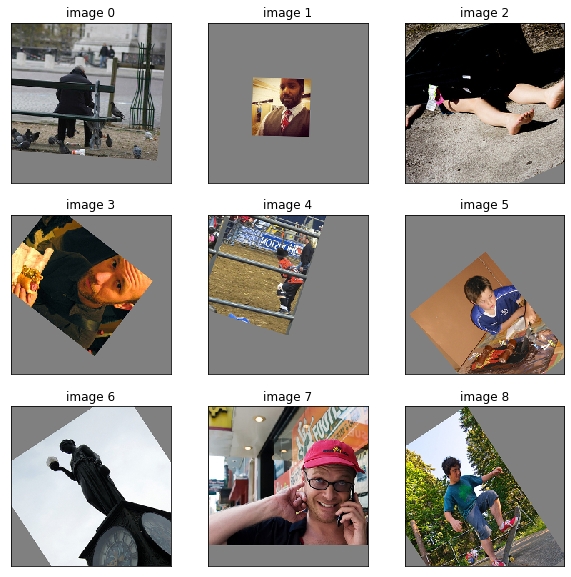

In [8]:
x_batch = x.numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='image {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    plt.imshow(img[:,:,[2,1,0]])    

## Heatmaps

float32
1.0
0.0


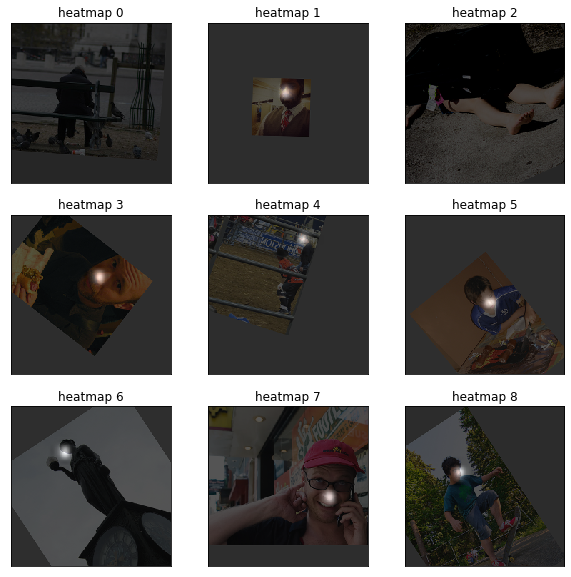

In [11]:
body_part = 0
output_idx = 1

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()


print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    heatmap = y_batch[i,...]
    
    heatmap1 = cv2.resize(heatmap[:, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(heatmap1[:,:], alpha=.7, cmap='gray')

## PAF dx

float32
0.9998455
-0.9999982


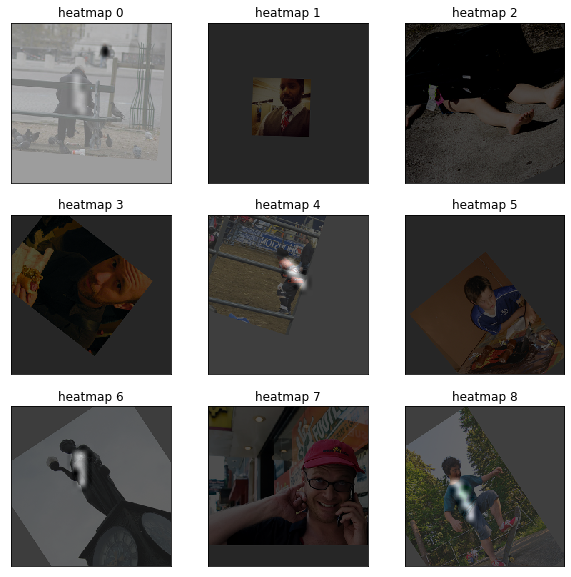

In [12]:
paf_idx = 0
output_idx = 0

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()

print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    paf = y_batch[i,...]
    
    paf1 = cv2.resize(paf[:, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(paf1[:,:], alpha=.7, cmap='gray')

## PAF dy

float32
0.9998455
-0.9999982


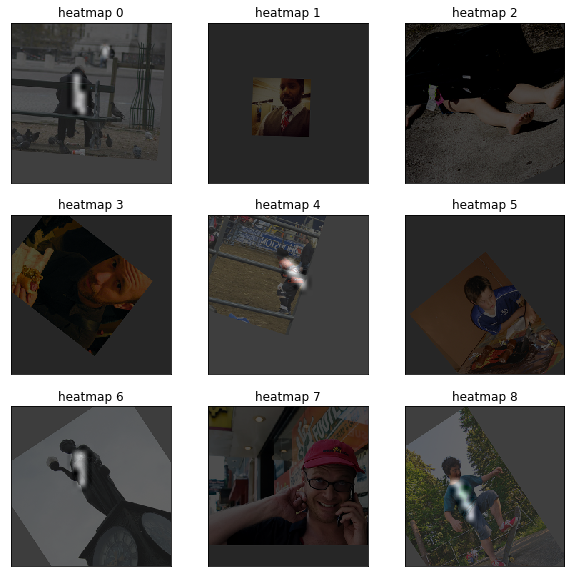

In [13]:
paf_idx = 1
output_idx = 0

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()

print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    paf = y_batch[i,...]
    
    paf1 = cv2.resize(paf[:, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(paf1[:,:], alpha=.7, cmap='gray')

# Dataset for VGG with masks

In [2]:
annot_path_val = '../datasets/coco_2017_dataset/annotations/person_keypoints_val2017.json'
img_dir_val = '../datasets/coco_2017_dataset/val2017/'

ds, ds_size = get_dataset_with_masks(annot_path_val, img_dir_val, batch_size=10)

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000
[1004 20:11:51 @argtools.py:146] WRN Starting a process with 'fork' method is not safe and may consume unnecessary extra CPU memory. Use 'forkserver/spawn' method (available after Py3.4) instead if you run into any issues. See https://docs.python.org/3/library/multiprocessing.html#contexts-and-start-methods


## Get batch

In [3]:
x,y = next(ds.__iter__())

print ("Inputs:")
for inp in x:
    print (inp.shape)

print ("Outputs:")
for output in y:
    print (output.shape)

Inputs:
(10, 368, 368, 3)
(10, 46, 46, 38)
(10, 46, 46, 19)
Outputs:
(10, 46, 46, 38)
(10, 46, 46, 19)


## Input images

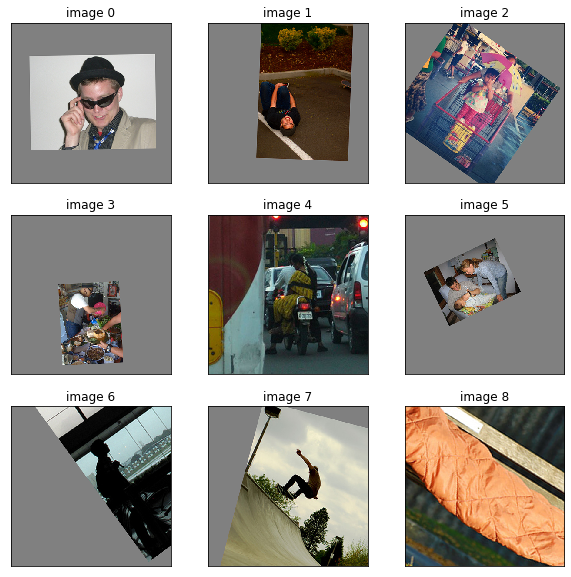

In [4]:
x_batch = x[0].numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='image {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    plt.imshow(img[:,:,[2,1,0]])    

## Input masks

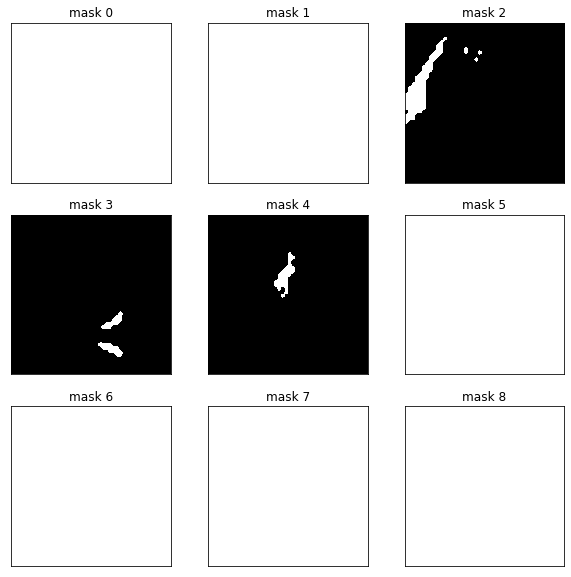

In [5]:
x_batch = x[1].numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='mask {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,:,:,0]
    img = cv2.resize(img, (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img, cmap='binary')    
    